# Question 1

The correlation coefficient p_ij , defined as the Pearson correlation between log-normalized returns, is bounded between −1 and 1. These bounds reflect the strength and direction of linear relationships between the time series of two stocks.

* p_ij = 1 -> perfect postiive correlation (stocks move in sync)
* p_ij = -1 -> perfect negative correlation (stocks move oppositely)
* p_ij = 0 -> no linear correlation

Log-normalized returns  r_i(t) = log(1 + q_i(t))  are preferred over simple returns for several reasons:

1. Additivity: Log-returns can be summed across time intervals, enabling consistent aggregation when analyzing weekly or monthly data. This is not possible with simple returns.

2. Statistical Normality: Log-returns tend to be more symmetrically distributed and closer to Gaussian, which improves the reliability of correlation estimates. This is especially important since the Pearson correlation assumes linearity and approximate normality.

3. Scale Invariance: Log-returns normalize price changes, allowing meaningful comparisons across stocks regardless of their price levels — critical when constructing a unified correlation graph.

4. Balanced Interpretation of Gains/Losses: Log-returns treat upward and downward movements more symmetrically than simple returns, avoiding skewed effects and ensuring unbiased measurement of volatility and co-movement.

These advantages make log-normalized returns the appropriate choice for correlation-based graph construction and clustering of stock behaviors over different time scales.

# Question 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

# Path to the folder with stock CSVs
data_dir = "/content/drive/MyDrive/finance_data/data"

In [4]:
# Helper: compute log returns from Close prices
def get_log_returns(file_path):
    df = pd.read_csv(file_path)
    df = df.sort_values("Date")
    prices = df["Close"].values
    log_returns = np.diff(np.log(prices))
    return log_returns

# List all CSVs
stock_files = glob(os.path.join(data_dir, "*.csv"))
stock_names = [os.path.basename(f).replace(".csv", "") for f in stock_files]

# Get shortest common time series length
min_len = min(len(get_log_returns(f)) for f in stock_files)

# Collect aligned log return series
log_return_list = [get_log_returns(f)[:min_len] for f in stock_files]
log_return_matrix = np.column_stack(log_return_list)
log_return_df = pd.DataFrame(log_return_matrix, columns=stock_names)

In [5]:
# Pearson correlation between columns
cor_matrix = log_return_df.corr().values  # ρ_ij

# Convert to edge weights using: w_ij = sqrt(2(1 - ρ_ij))
weight_matrix = np.sqrt(2 * (1 - cor_matrix))

# Upper triangle only (excluding diagonal as self edges are not meaningful)
upper_tri_indices = np.triu_indices_from(weight_matrix, k=1)
edge_weights = weight_matrix[upper_tri_indices]

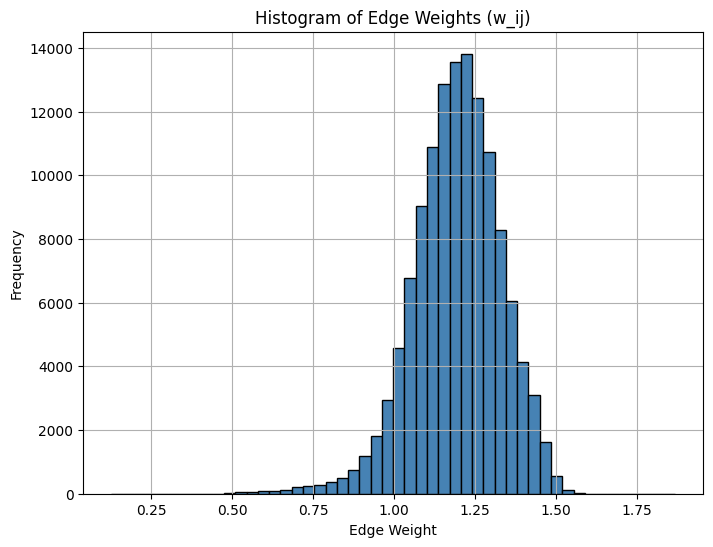

In [6]:
# Histogram of edge weights
plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=50, color="steelblue", edgecolor="black")
plt.title("Histogram of Edge Weights (w_ij)")
plt.xlabel("Edge Weight")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

The histogram of edge weights w_ij reveals that most stock pairs exhibit moderate positive correlation, with weights peaking around 1.2 (equivalent to  p_ij ≅ 0.3 ).

Very few stock pairs are highly correlated ( w_ij < 0.75 ) or strongly anti-correlated ( w_ij > 1.7 ), suggesting that most stocks move somewhat independently, especially across sectors.

This pattern is consistent with a diversified market where sector-specific or macroeconomic factors induce partial co-movement, while many stocks remain relatively uncorrelated.

# Question 3

# Question 4

# Question 5

# Question 6

# Question 7

# Question 8

# Question 9

# Question 10

# Question 11

# Question 12

# Question 13

# Question 14

# Question 15

# Question 16

# Question 17

# Question 18

# Question 19

# Question 20

# Question 21

# Question 22

# Question 23

# Question 24

# Define your task